In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

if os.getcwd() == '/content':
    data_path = '/content/drive/MyDrive/Colab Notebooks/datasets'
else:
    data_path = r'G:\내 드라이브\Colab Notebooks\datasets'

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# hyper-params
input_size = 784 # 28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST
train_dataset = datasets.MNIST(root=data_path, train=True, download=True,
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root=data_path, train=False, download=True,
                              transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         shuffle=False)

In [6]:
len(train_dataset)

60000

In [7]:
examples = iter(train_loader)
samples, labels = examples.next()
samples.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

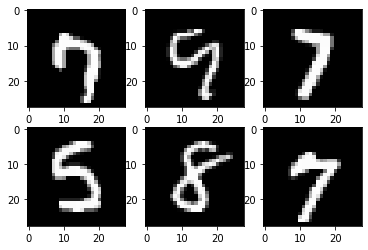

In [8]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [10]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # (100, 1, 28, 28) -> (100, 784)
        images = images.reshape(-1, 28*28).to(device)
        laebls = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        laebls = labels.to(device)
        
        outputs = model(images)
        
        # value, index
        _, preidcitions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (preidcitions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy : {acc}')

epoch 1 / 2, step 100/600, loss = 0.5505
epoch 1 / 2, step 200/600, loss = 0.3183
epoch 1 / 2, step 300/600, loss = 0.3576
epoch 1 / 2, step 400/600, loss = 0.3001
epoch 1 / 2, step 500/600, loss = 0.3083
epoch 1 / 2, step 600/600, loss = 0.2303
epoch 2 / 2, step 100/600, loss = 0.1752
epoch 2 / 2, step 200/600, loss = 0.1599
epoch 2 / 2, step 300/600, loss = 0.1872
epoch 2 / 2, step 400/600, loss = 0.0905
epoch 2 / 2, step 500/600, loss = 0.0919
epoch 2 / 2, step 600/600, loss = 0.1454
accuracy : 0.95
